### Initial Imports

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, gamma, lognorm, weibull_min, gaussian_kde, skew, genpareto
import seaborn as sns
from copulas.multivariate import GaussianMultivariate
from sklearn.preprocessing import QuantileTransformer
import pymannkendall as mk
from mpl_toolkits.basemap import Basemap

## Question 3

In [2]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


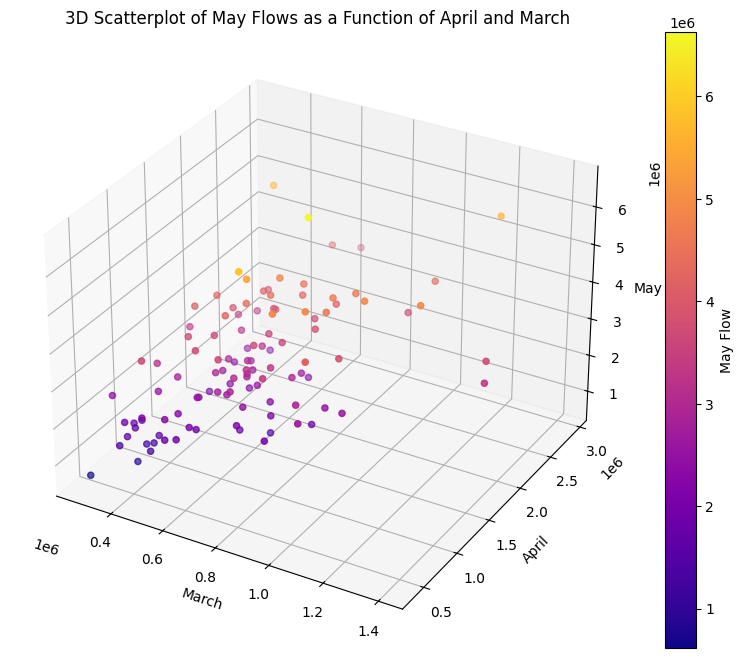

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(lee_ferry['Mar'], lee_ferry['Apr'], lee_ferry['May'], 
                     c=lee_ferry['May'], cmap='plasma')
fig.colorbar(scatter, label='May Flow')

ax.set_xlabel('March')
ax.set_ylabel('April')
ax.set_zlabel('May')

plt.title('3D Scatterplot of May Flows as a Function of April and March')
plt.show()

## Question 4

# May

In [4]:
may = np.array(lee_ferry['May'])
may_pandas = pd.DataFrame(lee_ferry['May'])
may

array([3635101, 2702179, 1595614, 3349297, 3298793, 2924637, 3684152,
       3270773, 4685651, 2427137, 3736188, 3763312, 2760606, 3231443,
       5917499, 4180109, 4874849, 4029114, 3384372, 2624348, 3686355,
       4348392, 4821916, 4602167, 2225165, 1515196, 4465792, 1743460,
       1509729, 1659496, 4139077, 3944714, 3725399, 2975185, 2559692,
       5436441, 3586298, 2483874, 3684541, 3255617, 1979996, 3702981,
       4108490, 3564293, 2239709, 2133211, 5554490, 1342116, 1804002,
       1993763, 2926653, 2889416, 4780048, 1422316, 2032109, 1695847,
       4111052, 1860875, 2430315, 3336138, 2431492, 1846928, 2211325,
       3765327, 3676415, 2483329, 1982707, 4575588, 3351494, 2780986,
       2512577,  616062, 2767077, 4004959, 4411471, 1246368, 3217893,
       3844250, 6628365, 5606346, 4287464, 3702789, 2199411, 1778580,
       1309652, 2361798, 2497785, 4904073, 2495467, 2642353, 3562190,
       4911189, 3878483, 2833327, 2690228, 3040039,  820372, 2267512,
       2039820, 4162

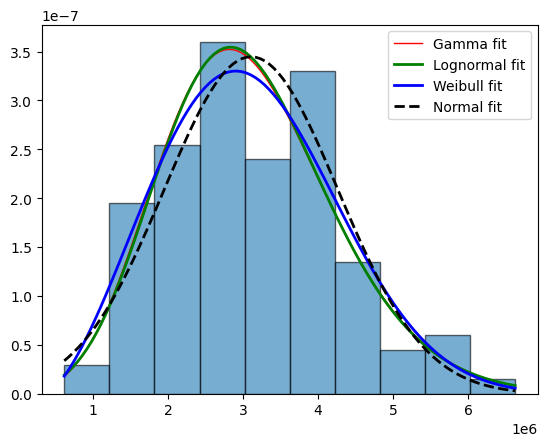

In [5]:
#May
# may = np.array(lee_ferry['May'])
# may_pandas = pd.DataFrame(lee_ferry['May'])


#normal
mean_n, std_n = norm.fit(may)
#gamma
g_fit = gamma.fit(may)
#lognormal
ln_fit = lognorm.fit(may)
#weibull
wb_fit = weibull_min.fit(may)


x = np.linspace(min(may), max(may), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

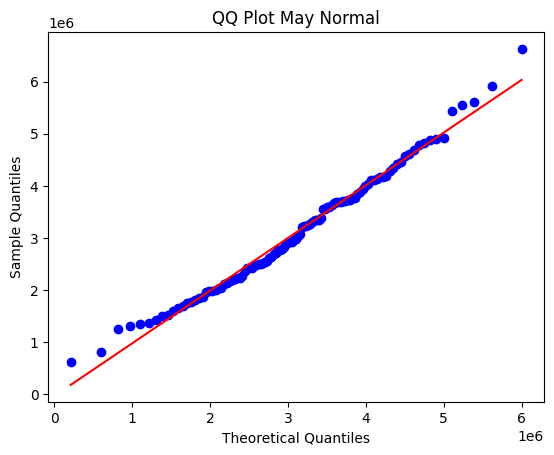

In [6]:
stats.probplot(may, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot May Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

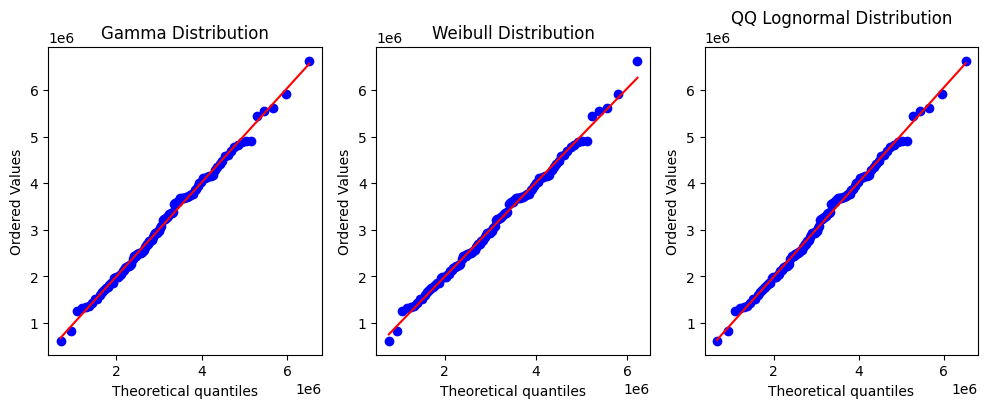

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(may, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(may, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(may, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [8]:
statistic, p_value = stats.kstest(may, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(may, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(may, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(may, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.06007286857476535
Normal P-value: 0.7952783900571778
Gamma K-S Statistic: 0.06541986067118755
Gamma P-value: 0.7040221058892594
Weibull K-S Statistic: 0.051319455258425295
Weibull P-value: 0.9172135633668114
Lognormal K-S Statistic: 0.0656601191463071
Lognormal P-value: 0.6997838322906176


Text(0.5, 1.0, 'May KDE Estimation')

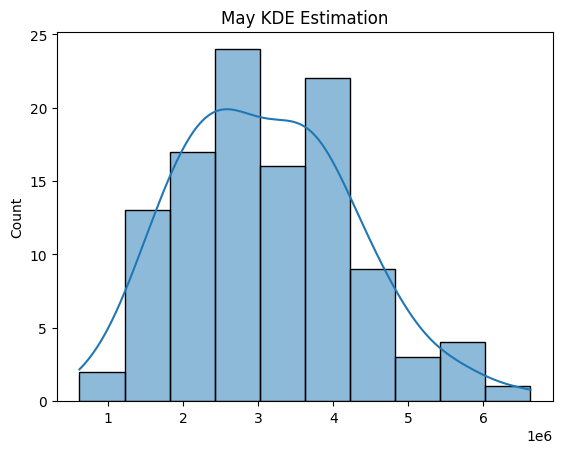

In [9]:
sns.histplot(data = may, kde=True)
plt.title('May KDE Estimation')

## Aug

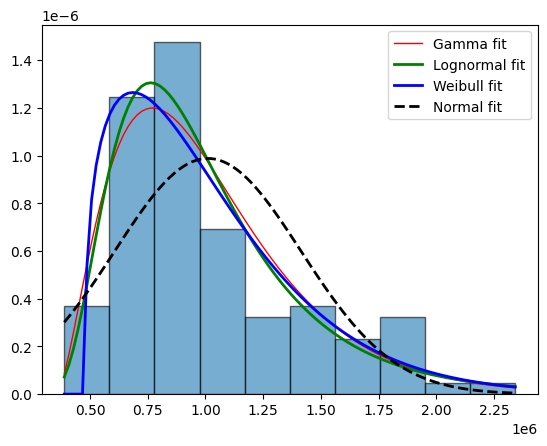

In [10]:
##Aug
Aug = np.array(lee_ferry['Aug'])
#normal
mean_n, std_n = norm.fit(Aug)
#gamma
g_fit = gamma.fit(Aug)
#lognormal
ln_fit = lognorm.fit(Aug)
#weibull
wb_fit = weibull_min.fit(Aug)

x = np.linspace(min(Aug), max(Aug), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Aug, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

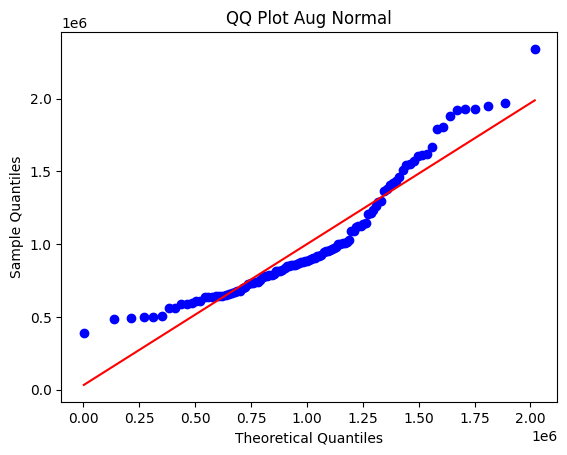

In [11]:
stats.probplot(Aug, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

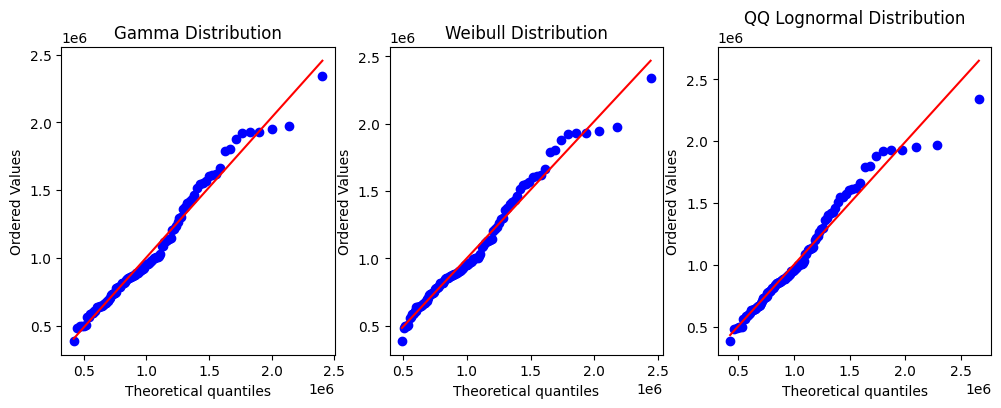

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Aug, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Aug, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Aug, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [13]:
statistic, p_value = stats.kstest(Aug, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Aug, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Aug, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Aug, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.1623153538906797
Normal P-value: 0.0050540268644102505
Gamma K-S Statistic: 0.08203681345518143
Gamma P-value: 0.4213310485865376
Weibull K-S Statistic: 0.07332568706302134
Weibull P-value: 0.5641620179826017
Lognormal K-S Statistic: 0.0634161265536094
Lognormal P-value: 0.7390286494767206


Text(0.5, 1.0, 'Aug KDE Estimation')

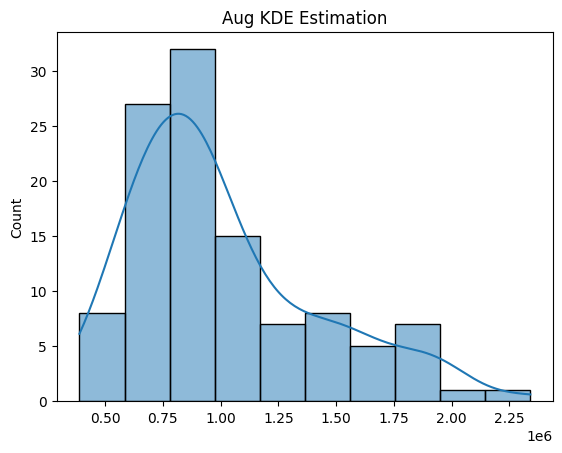

In [14]:
sns.histplot(data = Aug, kde=True)
plt.title('Aug KDE Estimation')

## Dec

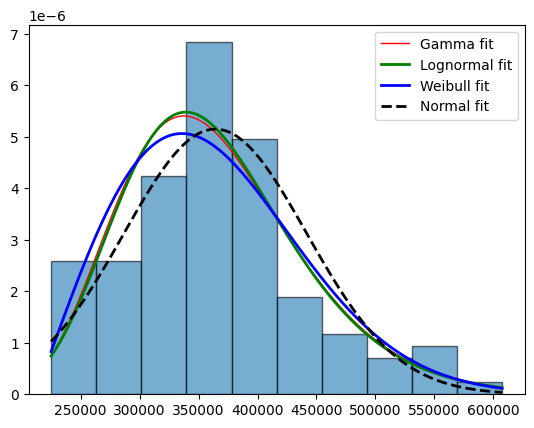

In [15]:
#Dec
Dec = np.array(lee_ferry['Dec'])
#normal
mean_n, std_n = norm.fit(Dec)
#gamma
g_fit = gamma.fit(Dec)
#lognormal
ln_fit = lognorm.fit(Dec)
#weibull
wb_fit = weibull_min.fit(Dec)

x = np.linspace(min(Dec), max(Dec), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Dec, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

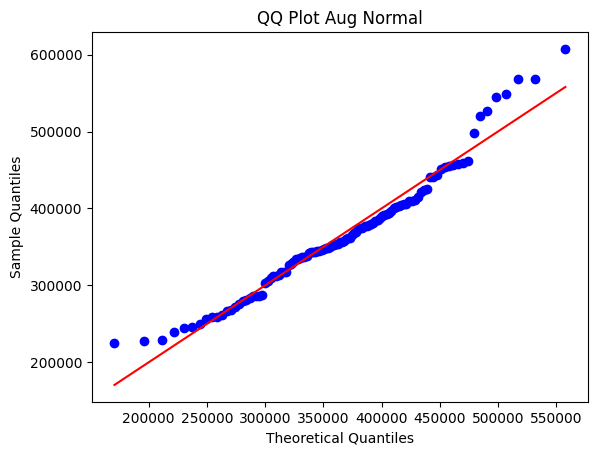

In [16]:
stats.probplot(Dec, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

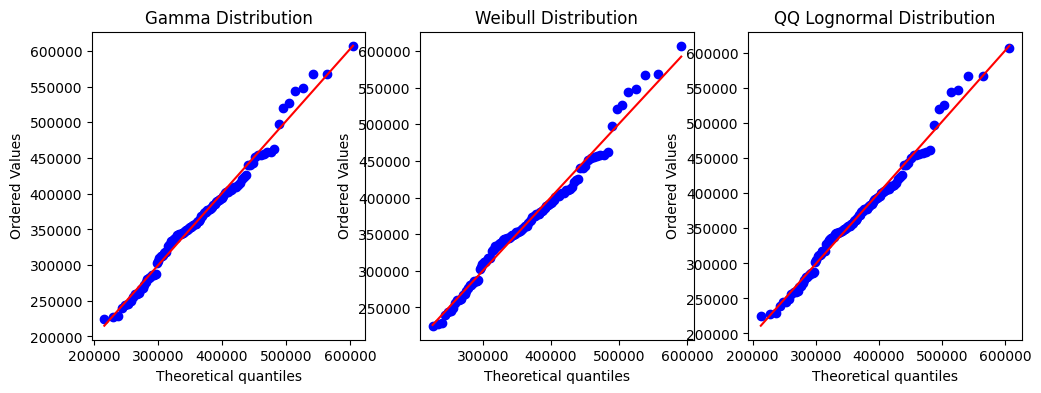

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Dec, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Dec, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Dec, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [18]:
statistic, p_value = stats.kstest(Dec, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print("Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Dec, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Dec, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Dec, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.07232808930305501
Normal P-value: {p_value}
Gamma K-S Statistic: 0.07770585501742899
Gamma P-value: 0.489934874735357
Weibull K-S Statistic: 0.08447837182427537
Weibull P-value: 0.3851882800457106
Lognormal K-S Statistic: 0.07441616172683779
Lognormal P-value: 0.5453134485209159


Text(0.5, 1.0, 'Dec KDE Estimation')

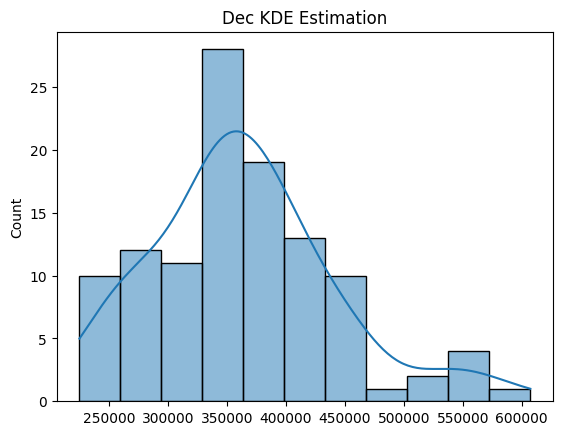

In [19]:
sns.histplot(data = Dec, kde=True)
plt.title('Dec KDE Estimation')

### Question 5

In [20]:
may = np.array(lee_ferry['May'])
may_pandas = pd.DataFrame(lee_ferry['May'])
may

array([3635101, 2702179, 1595614, 3349297, 3298793, 2924637, 3684152,
       3270773, 4685651, 2427137, 3736188, 3763312, 2760606, 3231443,
       5917499, 4180109, 4874849, 4029114, 3384372, 2624348, 3686355,
       4348392, 4821916, 4602167, 2225165, 1515196, 4465792, 1743460,
       1509729, 1659496, 4139077, 3944714, 3725399, 2975185, 2559692,
       5436441, 3586298, 2483874, 3684541, 3255617, 1979996, 3702981,
       4108490, 3564293, 2239709, 2133211, 5554490, 1342116, 1804002,
       1993763, 2926653, 2889416, 4780048, 1422316, 2032109, 1695847,
       4111052, 1860875, 2430315, 3336138, 2431492, 1846928, 2211325,
       3765327, 3676415, 2483329, 1982707, 4575588, 3351494, 2780986,
       2512577,  616062, 2767077, 4004959, 4411471, 1246368, 3217893,
       3844250, 6628365, 5606346, 4287464, 3702789, 2199411, 1778580,
       1309652, 2361798, 2497785, 4904073, 2495467, 2642353, 3562190,
       4911189, 3878483, 2833327, 2690228, 3040039,  820372, 2267512,
       2039820, 4162

In [21]:
shape, loc, scale = gamma.fit(may) #get the fit 
N = 500
gamma_mc = np.random.gamma(shape, scale, N) #use the parameters to generate gamma monte carlo samples 
gamma_mc.shape

(500,)

In [22]:
mean = shape * scale 
variance = shape * scale**2
sd= np.sqrt(variance)
skewness = skew(gamma_mc)
iqr = np.percentile(gamma_mc, 75) - np.percentile(gamma_mc, 25) 
median = np.median(gamma_mc)


Text(1.05, 5207743.364067878, 'iqr:  1360450.89')

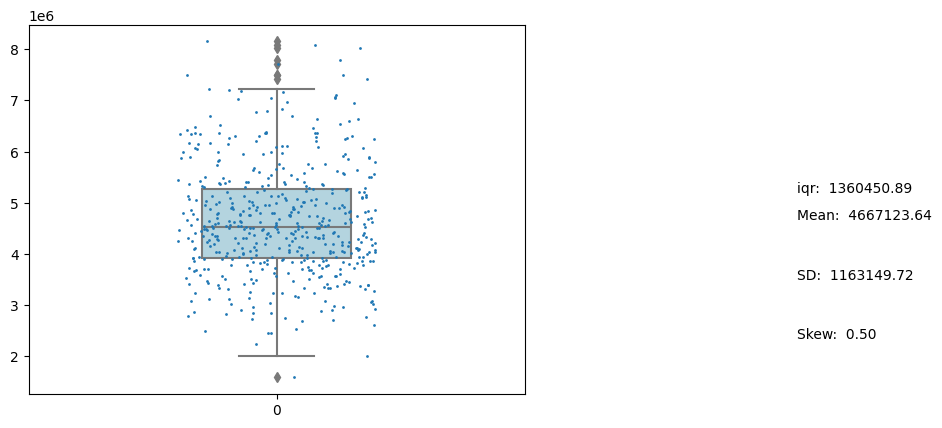

In [23]:
sns.boxplot(data=gamma_mc, color='lightblue', width = 0.3)
sns.stripplot(data=gamma_mc, size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')


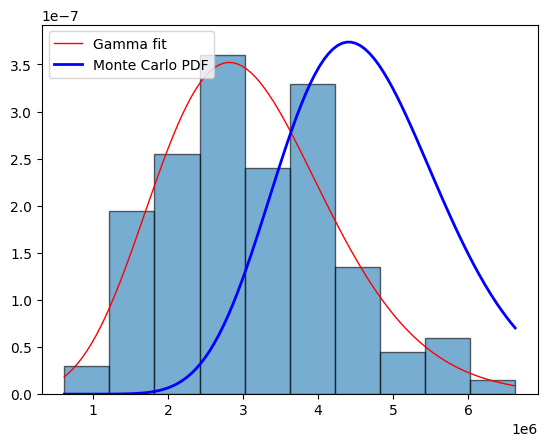

In [24]:
#gamma
g_fit2 = gamma.fit(may)
g_fit3 = gamma.fit(gamma_mc)


x = np.linspace(min(may), max(may), 100) 
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit2), 'r-', lw=1, label="Gamma fit")
plt.plot(x, gamma.pdf(x, *g_fit3), 'b-', lw=2, label ='Monte Carlo PDF')

plt.legend()
plt.show()

### Problem 6

In [25]:
def bootstrap(data, num_samples):
    bootstraped_data = []
    for _ in range(num_samples): #does it num_samples amount of time 
        boot_sample = np.random.choice(data, replace=True) #resamples the data with replacement 
        bootstraped_data.append(boot_sample)
    return np.array(bootstraped_data)

data = may 
num_samples = 500
boot_data = bootstrap(may, num_samples)
boot_data

array([2267512, 3586298, 3236583, 1362700, 2115387, 2199411, 2483329,
       1982707, 1982707, 1743460, 3562190, 3944714, 3079161, 3040039,
       4162824, 2483329, 2512577, 2430315, 3586298, 1982707, 1778580,
       1309652, 3336138, 4111052, 3562190, 1246368, 1993763, 4108490,
       5436441, 3349297, 2115387, 2032109, 3635101, 2760606, 4821916,
       2926653, 4029114, 6628365, 3231443, 3236583, 2975185, 2690228,
       4575588, 4411471, 2497785, 2175686, 2760606, 3236583, 2361798,
       4821916, 2512577, 1860875, 2559692, 3736188, 2430315, 3236583,
       2267512, 4029114, 2547942, 4821916, 5554490, 3040039, 1804002,
       2427137, 4685651, 1362700, 2361798, 4780048, 2702179, 1246368,
       1422316, 2767077, 1515196, 1778580, 1743460, 5554490, 2115387,
       1778580, 2430315, 2642353, 3944714, 3944714,  820372, 3763312,
       3255617, 4162824, 5606346, 2430315, 2361798, 4161938, 2483874,
       1422316, 2427137, 3635101, 4904073, 2239709, 3585225, 2780986,
       3336138, 3702

In [26]:
mean = np.mean(boot_data)
print('Boot Data Mean is:', mean)
# Standard Deviation
std_dev = np.std(boot_data)
print(f"Standard Deviation: {std_dev:.2f}")

# Skew
skewness = stats.skew(boot_data)
print(f"Skewness: {skewness:.2f}")

# IQR
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25
print(f"Interquartile Range (IQR): {iqr:.2f}")

Boot Data Mean is: 3087195.018
Standard Deviation: 1147322.65
Skewness: 0.50
Interquartile Range (IQR): 1586543.50


Text(1.05, 5320789.670707401, 'iqr:  1586543.50')

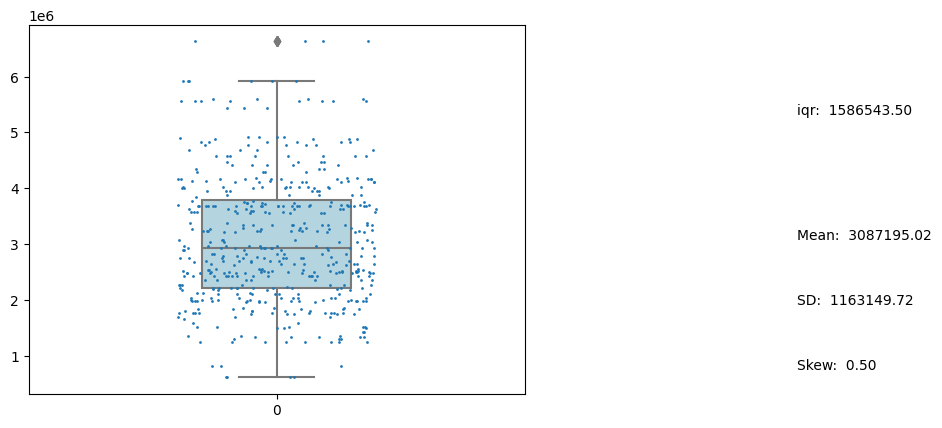

In [27]:
sns.boxplot(data=boot_data, color='lightblue', width = 0.3)
sns.stripplot(data=boot_data, size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')


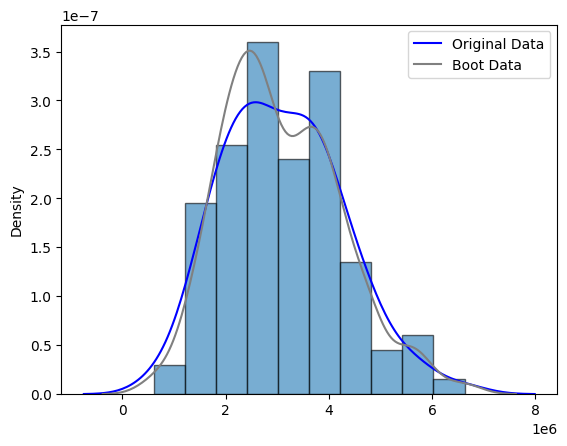

In [28]:
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(may, color='blue', label='Original Data')
sns.kdeplot(boot_data, color='grey', alpha=1, label = 'Boot Data')
plt.legend()

### Problem 7

In [29]:
apr_may_df =lee_ferry[['Apr', 'May']]
apr_may = np.array(apr_may_df)
apr_may

array([[1204640, 3635101],
       [1465838, 2702179],
       [1041224, 1595614],
       [1120492, 3349297],
       [1730475, 3298793],
       [ 951815, 2924637],
       [ 902408, 3684152],
       [1829662, 3270773],
       [1593815, 4685651],
       [1483872, 2427137],
       [1802735, 3736188],
       [1545288, 3763312],
       [ 901047, 2760606],
       [1414719, 3231443],
       [ 983984, 5917499],
       [ 930238, 4180109],
       [1224473, 4874849],
       [1296746, 4029114],
       [1658525, 3384372],
       [1469823, 2624348],
       [1722211, 3686355],
       [1369061, 4348392],
       [1103775, 4821916],
       [1774777, 4602167],
       [1862406, 2225165],
       [ 712221, 1515196],
       [1774718, 4465792],
       [ 579969, 1743460],
       [ 584844, 1509729],
       [ 703982, 1659496],
       [1465536, 4139077],
       [1594216, 3944714],
       [1725164, 3725399],
       [1250651, 2975185],
       [ 780974, 2559692],
       [1151420, 5436441],
       [2925816, 3586298],
 

#### Part A: Fit a Copula and Show the Bivariate Plot Along with the Data

In [30]:
scaler = QuantileTransformer()
transformed = scaler.fit_transform(apr_may)
copula = GaussianMultivariate()
copula.fit(transformed)

/home/anna/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (111). n_quantiles is set to n_samples.
  warnings.warn(
/home/anna/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/home/anna/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


In [31]:
x_grid = np.linspace(0, 1, 100)
y_grid = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_grid, y_grid)
grid_points = np.column_stack([X.ravel(), Y.ravel()])


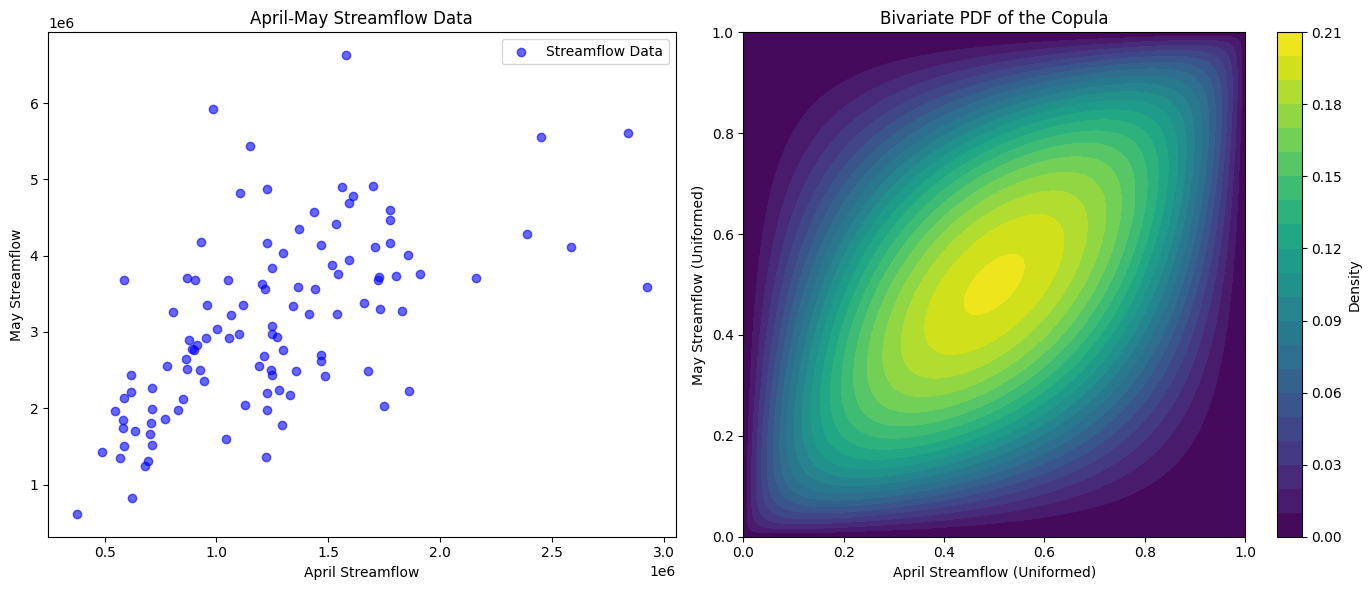

In [32]:
pdf_values = copula.pdf(grid_points).reshape(X.shape)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(apr_may_df['Apr'].values, apr_may_df['May'].values,  color='blue', alpha=0.6, label='Streamflow Data')
axes[0].set_title("April-May Streamflow Data")
axes[0].set_xlabel("April Streamflow")
axes[0].set_ylabel("May Streamflow")
axes[0].legend()

cp = axes[1].contourf(X, Y, pdf_values, cmap='viridis', levels=20)
axes[1].set_title("Bivariate PDF of the Copula")
axes[1].set_xlabel("April Streamflow (Uniformed)")
axes[1].set_ylabel("May Streamflow (Uniformed)")
fig.colorbar(cp, ax=axes[1], label="Density")
plt.tight_layout()
plt.show()

#### Part B: Generate 500 Samples, Boxplot the statistics and PDF's from the simluations along with that of the historic data for April and May Flow

Copula Samples Mean is: 1242095.4569241228
Copula STD is 494334.54323940474
Skewness 0.817687233991601
Interquartile Range (IQR): 696757.1369434644


Text(0.5, 4875896.489179133, 'iqr:  696757.14')

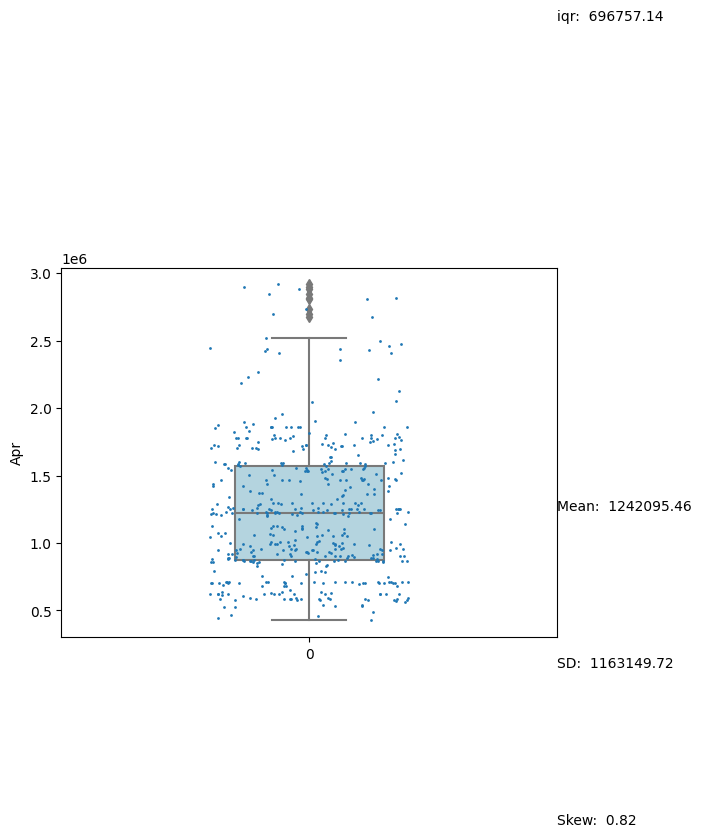

In [33]:
generated_samples = copula.sample(500)
generated_data = scaler.inverse_transform(generated_samples)
generated_data_df = pd.DataFrame(generated_data)
generated_data_df.columns= ['Apr', 'May']
generated_data_df


mean = np.mean(generated_data_df['Apr'])
print('Copula Samples Mean is:', mean)
# Standard Deviation
std_dev = np.std(generated_data_df['Apr'])
print('Copula STD is', std_dev)

# Skew
skewness = stats.skew(generated_data_df['Apr'])
print('Skewness', skewness)

# IQR
q75, q25 = np.percentile(generated_data_df['Apr'], [75, 25])
iqr = q75 - q25
print('Interquartile Range (IQR):', iqr)

sns.boxplot(data=generated_data_df['Apr'], color='lightblue', width = 0.3)
sns.stripplot(data=generated_data_df['Apr'], size=2, jitter = 0.2)
plt.text(0.5, mean, f'Mean: {mean: .2f}') #mean 
plt.text(0.5, mean - sd, f'SD: {sd: .2f}')
plt.text(0.5, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(0.5, iqr / 2 + median, f'iqr: {iqr: .2f}')

Copula Samples Mean is: 3127939.091313286
Copula STD is 1134646.2672967908
Skewness 0.37785490218599543
Interquartile Range (IQR): 1577556.8709896118


Text(1.05, 5316296.356202207, 'iqr:  1577556.87')

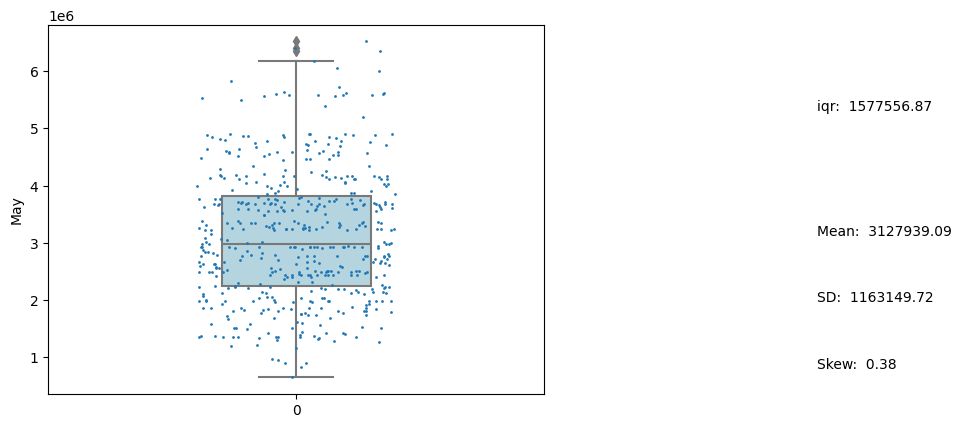

In [34]:
mean = np.mean(generated_data_df['May'])
print('Copula Samples Mean is:', mean)
# Standard Deviation
std_dev = np.std(generated_data_df['May'])
print('Copula STD is', std_dev)

# Skew
skewness = stats.skew(generated_data_df['May'])
print('Skewness', skewness)

# IQR
q75, q25 = np.percentile(generated_data_df['May'], [75, 25])
iqr = q75 - q25
print('Interquartile Range (IQR):', iqr)

sns.boxplot(data=generated_data_df['May'], color='lightblue', width = 0.3)
sns.stripplot(data=generated_data_df['May'], size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')

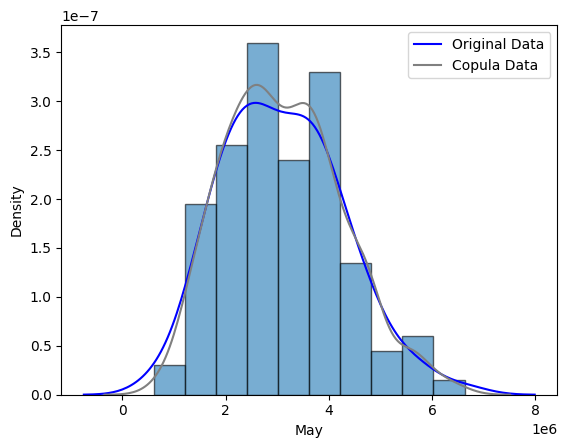

In [35]:
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(may, color='blue', label='Original Data')
sns.kdeplot(data=generated_data_df['May'], color='grey', alpha=1, label = 'Copula Data')
plt.legend()



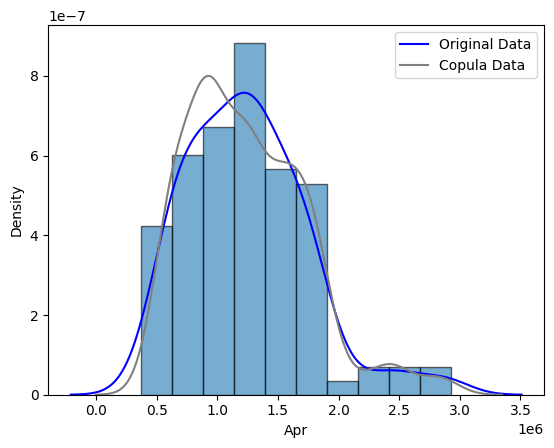

In [36]:
apr = lee_ferry['Apr']
plt.hist(apr, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(apr, color='blue', label='Original Data')
sns.kdeplot(generated_data_df['Apr'], color='grey', alpha=1, label = 'Copula Data')
plt.legend()

#### Problem 8

In [37]:
chippewa = pd.read_excel('/home/anna/Desktop/Engineering-Probability---Statistics/Chippewa River StreamFlow Data.xls')
chippewa = chippewa.set_index('Year')
chippewa = chippewa.iloc[:111]
chippewa_streamflow = chippewa['StreamFlow'].values

#### A) Gumbel EV-1 Distribution

In [38]:
fit = stats.gumbel_r.fit(chippewa_streamflow)
fit
estimate = stats.gumbel_r.ppf(1 - 1/500, *fit)
estimate

31648.464915056327

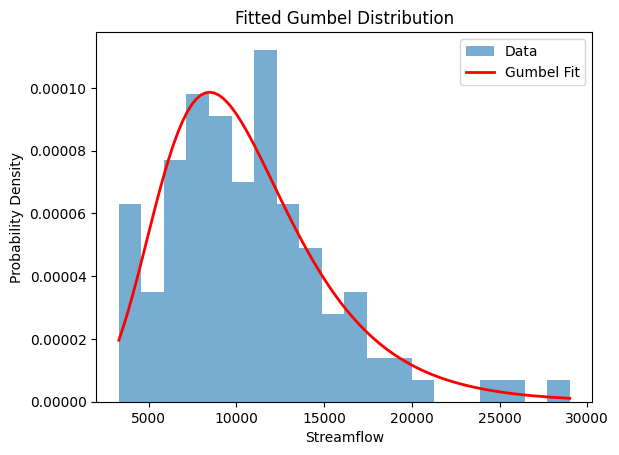

In [39]:
x = np.linspace(min(chippewa_streamflow), max(chippewa_streamflow), 100)
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Data')

#Plot the fitted Gumbel distribution
plt.plot(x, stats.gumbel_r.pdf(x, *fit), 'r-', lw=2, label='Gumbel Fit')

plt.xlabel('Streamflow')
plt.ylabel('Probability Density')
plt.title('Fitted Gumbel Distribution')
plt.legend()
plt.show()



#### B) Log-Pearson Type 3

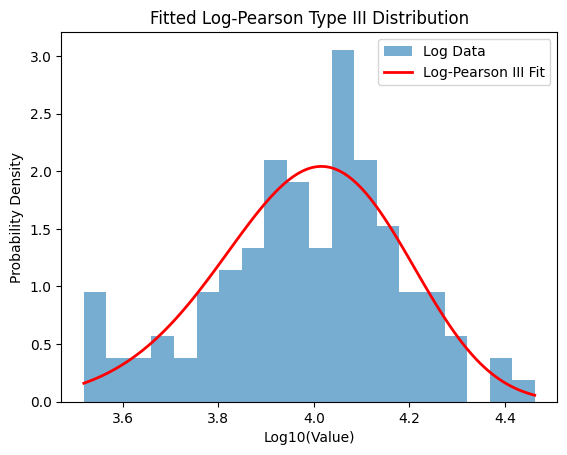

In [40]:
log_data = np.log10(chippewa_streamflow)

# Fit the Pearson Type III distribution to the log-transformed data
shape, loc, scale = stats.pearson3.fit(log_data)

# Generate x values for plotting
x = np.linspace(min(log_data), max(log_data), 100)

# Plot histogram of log-transformed data
plt.hist(log_data, bins=20, density=True, alpha=0.6, label='Log Data')

# Plot the fitted Log-Pearson Type III distribution
plt.plot(x, stats.pearson3.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Pearson III Fit')

plt.xlabel('Log10(Value)')
plt.ylabel('Probability Density')
plt.title('Fitted Log-Pearson Type III Distribution')
plt.legend()
plt.show()

In [41]:
log_estimate = stats.pearson3.ppf(1 - 1/500, shape, loc=loc, scale=scale)
estimate = np.exp(log_estimate)
estimate


87.58563247013053

### C) Log Normal

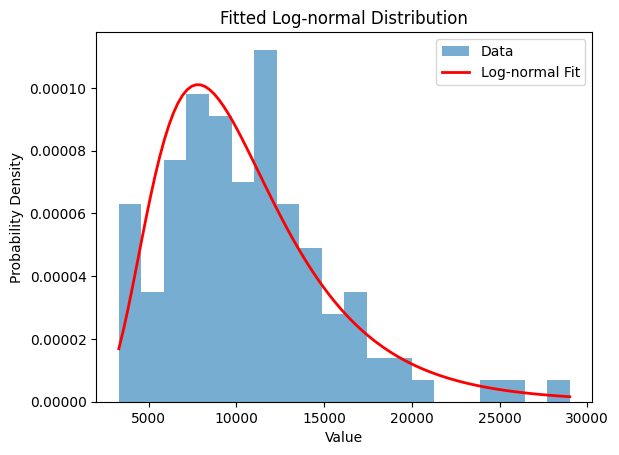

In [42]:
shape, loc, scale = stats.lognorm.fit(chippewa_streamflow, floc=0)

# Generate x values for plotting
x = np.linspace(min(chippewa_streamflow), max(chippewa_streamflow), 100)

# Plot histogram of data
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Data')

# Plot the fitted log-normal distribution
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-normal Fit')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitted Log-normal Distribution')
plt.legend()
plt.show()

In [43]:
return_levels = stats.lognorm.ppf(1 - 1/np.array(500), shape, loc, scale)
return_levels

35665.545387581835

### D) Generalized Extreme Value Distributions

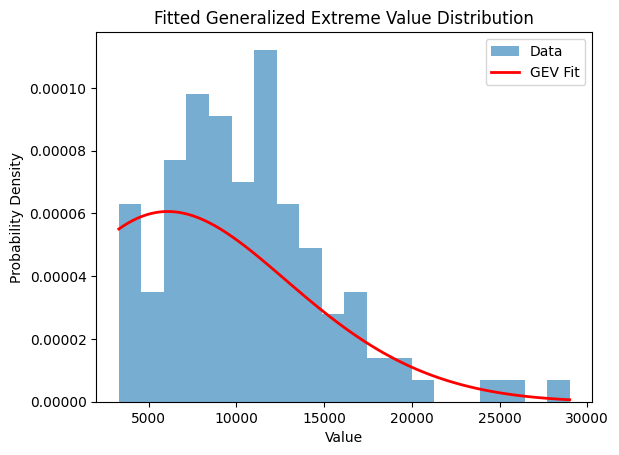

Shape: 0.1811
Location: 4877.0045
Scale: 6175.6374


In [44]:
shape, loc, scale = stats.genextreme.fit(chippewa_streamflow)

# Generate x values for plotting
x = np.linspace(min(chippewa_streamflow), max(chippewa_streamflow), 100)

# Plot histogram of data
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Data')

# Plot the fitted GEV distribution
plt.plot(x, stats.genextreme.pdf(x, shape, loc, scale), 'r-', lw=2, label='GEV Fit')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitted Generalized Extreme Value Distribution')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Shape: {shape:.4f}")
print(f"Location: {loc:.4f}")
print(f"Scale: {scale:.4f}")

In [45]:
return_levels = stats.genextreme.ppf(1 - 1/np.array(50), shape, loc, scale)
return_levels

22156.259335851704

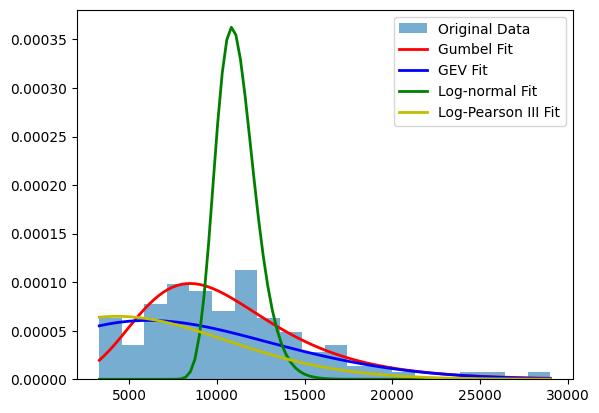

In [46]:
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Original Data')

#Plot the fitted Gumbel distribution
plt.plot(x, stats.gumbel_r.pdf(x, *fit), 'r-', lw=2, label='Gumbel Fit')
plt.plot(x, stats.genextreme.pdf(x, shape, loc, scale), 'b-', lw=2, label='GEV Fit')
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'g-', lw=2, label='Log-normal Fit')
plt.plot(x, stats.pearson3.pdf(x, shape, loc, scale), 'y-', lw=2, label='Log-Pearson III Fit')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Pearson Type III Distribution')

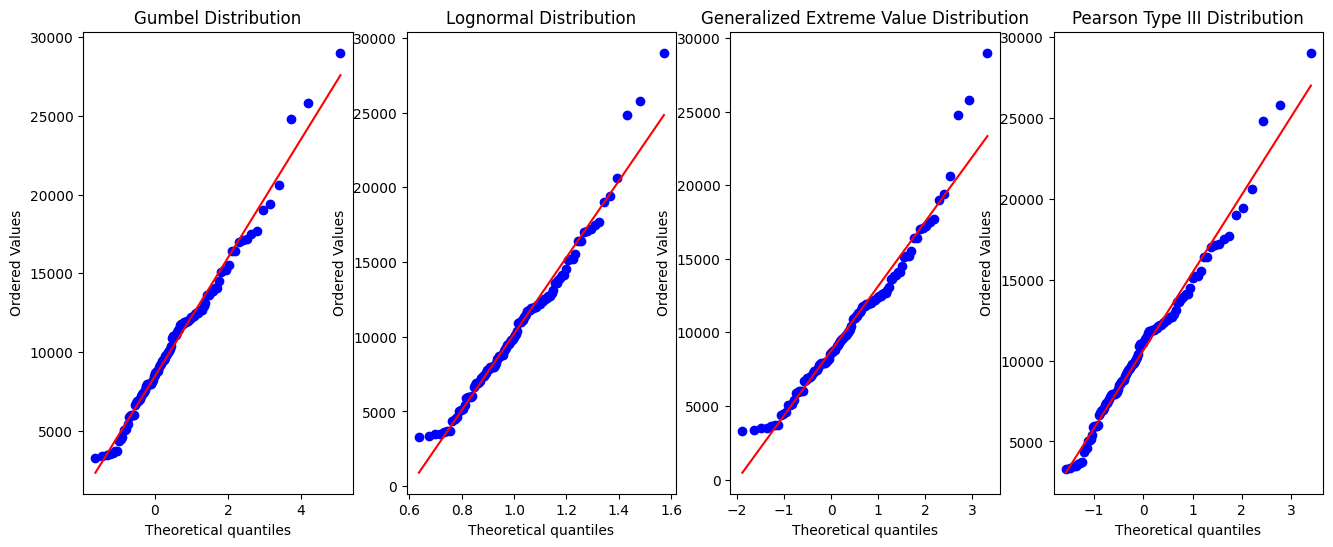

In [47]:
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# QQ plot for Gamma distribution
stats.probplot(chippewa_streamflow, dist="gumbel_r", plot=axs[0])
axs[0].set_title("Gumbel Distribution")

# QQ plot for Lognormal distribution
stats.probplot(chippewa_streamflow, dist=stats.lognorm(s=shape), plot=axs[1])
axs[1].set_title("Lognormal Distribution")

# QQ plot for Generalized Extreme Value distribution
stats.probplot(chippewa_streamflow, dist=stats.genextreme(shape), plot=axs[2])
axs[2].set_title("Generalized Extreme Value Distribution")

# QQ plot for Pearson Type III distribution
skew = stats.skew(chippewa_streamflow)
stats.probplot(chippewa_streamflow, dist=stats.pearson3(skew), plot=axs[3])
axs[3].set_title("Pearson Type III Distribution")

### Problem 9

In [48]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >5) & (h3['CL18 Sum for Year'] >5)]

Shape, loc, and scale parameters for threshold 5 are 0.701393853522982 5.452438566437497 14.25044099673539


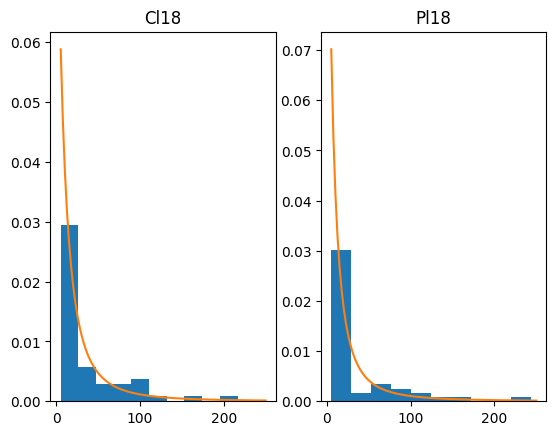

In [49]:
Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
shape2, loc2, scale2 = genpareto.fit(Cl18)
x1 = np.linspace(loc1, 250, 100)
x2 = np.linspace(loc2, 250, 100)

pdf1 = genpareto.pdf(x1, c=shape1, loc=loc1, scale=scale1)
pdf2 = genpareto.pdf(x2, c=shape2, loc=loc2, scale=scale2)
plt.subplot(1,2,2)
plt.hist(Pl18, density=True)
plt.plot(x1, pdf1)
plt.title('Pl18')
plt.subplot(1,2,1)
plt.hist(Cl18, density = True)
plt.plot(x2, pdf2)
plt.title('Cl18')

print('Shape, loc, and scale parameters for threshold 5 are', shape1, loc1, scale1)

### 100 year return period

In [50]:
T = 100  # in years
p = 1 / T  # Exceedance probability

# Compute the 100-year return level
return_level = stats.genpareto.ppf(1 - p, c=shape1, scale=scale1, loc=loc1)
return_level2 = stats.genpareto.ppf(1 - p, c=shape2, scale=scale2, loc=loc2)

print('Return level for PL18', return_level)
print('Return level for CL18', return_level2)


Return level for PL18 498.7694666792814
Return level for CL18 394.1126733557065


### Model fit with 2 and 6 thresholds

Shape, loc, and scale parameters for threshold 2 are 0.6420592174416839 2.0054881810684257 13.719606469666026


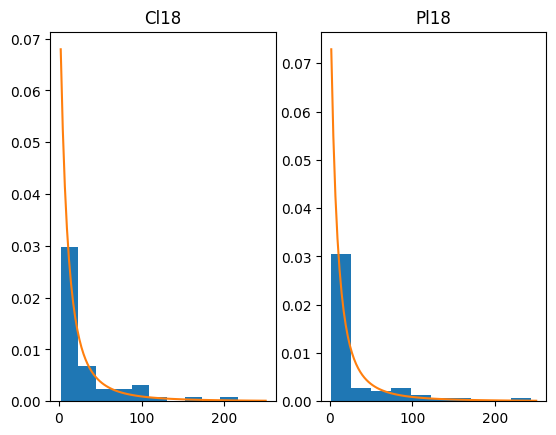

In [51]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >2) & (h3['CL18 Sum for Year'] >2)]

Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
shape2, loc2, scale2 = genpareto.fit(Cl18)
x1 = np.linspace(loc1, 250, 100)
x2 = np.linspace(loc2, 250, 100)

pdf1 = genpareto.pdf(x1, c=shape1, loc=loc1, scale=scale1)
pdf2 = genpareto.pdf(x2, c=shape2, loc=loc2, scale=scale2)
plt.subplot(1,2,2)
plt.hist(Pl18, density=True)
plt.plot(x1, pdf1)
plt.title('Pl18')
plt.subplot(1,2,1)
plt.hist(Cl18, density = True)
plt.plot(x2, pdf2)
plt.title('Cl18')

print('Shape, loc, and scale parameters for threshold 2 are', shape1, loc1, scale1)

Shape, loc, and scale parameters for threshold 6 are 0.6251979254257966 6.317866988214568 16.72424799209314


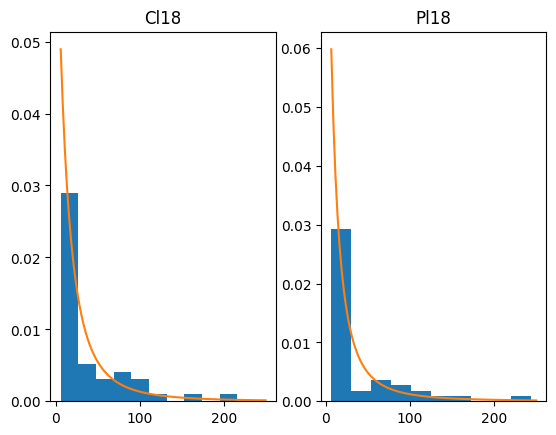

In [52]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >6) & (h3['CL18 Sum for Year'] >6)]

Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
shape2, loc2, scale2 = genpareto.fit(Cl18)
x1 = np.linspace(loc1, 250, 100)
x2 = np.linspace(loc2, 250, 100)

pdf1 = genpareto.pdf(x1, c=shape1, loc=loc1, scale=scale1)
pdf2 = genpareto.pdf(x2, c=shape2, loc=loc2, scale=scale2)
plt.subplot(1,2,2)
plt.hist(Pl18, density=True)
plt.plot(x1, pdf1)
plt.title('Pl18')
plt.subplot(1,2,1)
plt.hist(Cl18, density = True)
plt.plot(x2, pdf2)
plt.title('Cl18')

print('Shape, loc, and scale parameters for threshold 6 are', shape1, loc1, scale1)

#### Sensitivity: How parameters respond to change in threshold

In [53]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >8) & (h3['CL18 Sum for Year'] >8)]

Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
print('Shape, loc, and scale parameters for threshold  are', shape1, loc1, scale1)

Shape, loc, and scale parameters for threshold  are 1.4727607002186403 8.252290736791053 15.215094321032254


In [54]:
def sensitivity(threshold):
    h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
    h2 = h1.set_index(['Year'])
    h3 = h2 / 10**9
    h4 = h3[(h3['PL18 Sum for Year'] >threshold) & (h3['CL18 Sum for Year'] >threshold)]
    Pl18 = h4['PL18 Sum for Year'].values
    shape1, loc1, scale1 = genpareto.fit(Pl18)
    return shape1, scale1

shape = []
scale = []
for i in range(50):
    shape_list, scale_list = sensitivity(i)
    shape.append(shape_list)
    scale.append(scale_list)


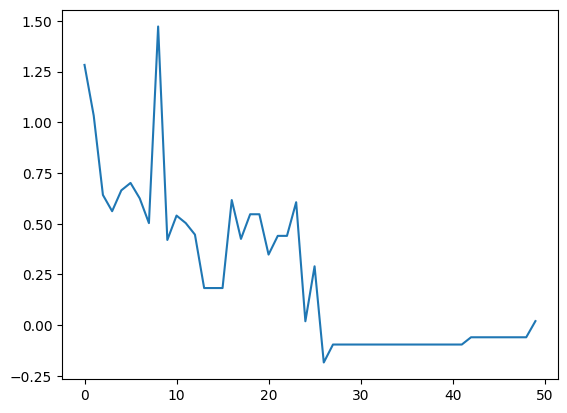

In [55]:
shape
plt.plot(shape)

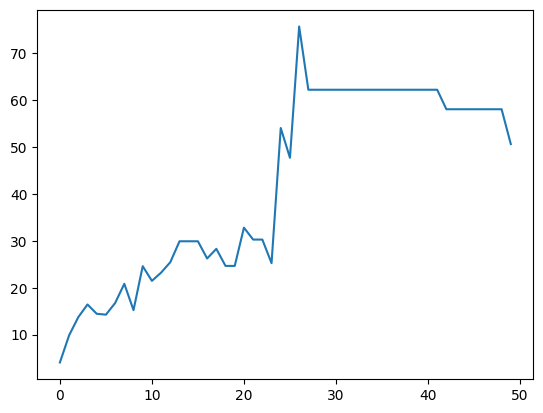

In [56]:
scale
plt.plot(scale)

#### The sensitivity of the model in terms of parameters appears to stabilize around 30. Thus, 30 would be an apt threshold

### Problem 10

In [123]:
india_rainfall = pd.read_csv('allIndia-JJAS-1901-2016.txt', delimiter=' ')
years = np.linspace(1901, 2016, 116)
india_rainfall = india_rainfall.set_index(years)

#### Each column is one .25 x .25 area

In [73]:
lat_lon = pd.read_csv('lon-lat-India-025grid.txt', delimiter=' ', header=None)
lat_lon.columns = ['Longitude', 'Latitude']
lat_lon

,Longitude,Latitude
0,8.25,77.00
1,8.25,77.25
2,8.25,77.50
3,8.25,77.75
4,8.50,76.75
...,...,...
4959,37.00,75.50
4960,37.25,74.50
4961,37.25,74.75
4962,37.25,75.00


#### a) Compute the Mann-Kendall Trend in Rainfall at Each Grid and Plot the Trends, along with the statistical significance at 95% confidence level

In [84]:
trend_all = []
p_value_all = []
slope_all = []

for column in india_rainfall:
    grid = np.array(india_rainfall[column].values)
    mk_result = mk.original_test(grid)
    trend = mk_result.trend
    trend_all.append(trend)
    p_value = mk_result.p
    p_value_all.append(p_value)
    slope = mk_result.slope
    slope_all.append(slope)

Text(0.5, 1.0, 'P_value per grid')

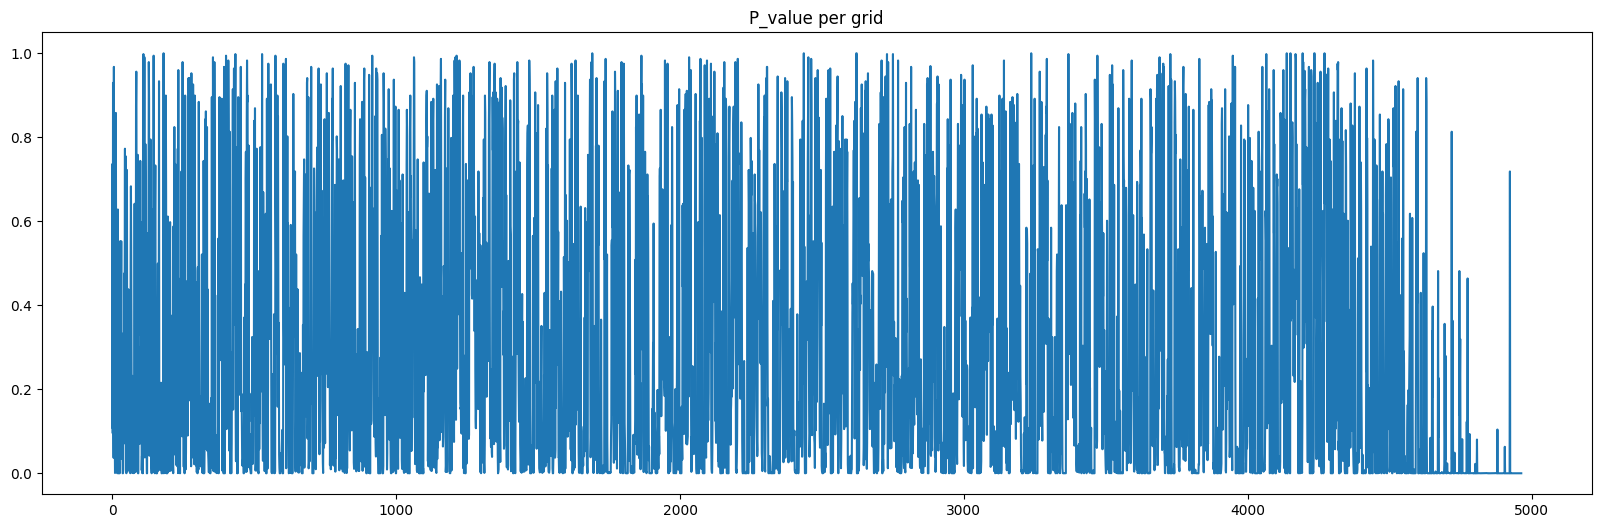

In [94]:
plt.figure(figsize=(20, 6))
sns.lineplot(p_value_all)
plt.title('P_value per grid')

<Axes: ylabel='Count'>

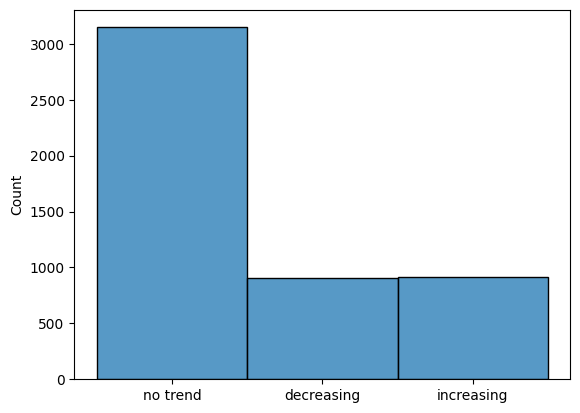

In [96]:
sns.histplot(trend_all)

#### B) Repeat a for the recent period 1980 through 2016

In [103]:
india_rainfall_recent = india_rainfall.iloc[79:116]
india_rainfall_recent

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4955,V4956,V4957,V4958,V4959,V4960,V4961,V4962,V4963,V4964
80,45.946228,37.137093,13.900354,2.955365,75.537460,63.675270,46.654930,2.435752,5.742099,1.793650,...,35.766151,36.515450,36.985004,36.734047,35.779861,34.614491,35.697151,36.320087,36.537735,36.151237
81,80.121170,61.490814,12.337578,6.901121,112.682213,112.961288,82.920547,13.452353,7.741923,6.164375,...,27.464319,25.826679,24.203373,22.578413,21.380009,21.343460,27.318462,25.727976,24.164597,22.764931
82,39.930470,31.801121,2.468921,2.739864,74.334427,63.148415,43.867989,6.277899,4.272225,1.965598,...,17.352112,18.768511,19.780363,19.987814,19.485592,18.734341,17.347282,18.571575,19.272882,19.364771
83,32.267021,28.619400,1.675267,1.770460,75.608047,51.250141,38.969841,5.923909,2.340945,1.546120,...,31.296261,30.163147,29.141535,28.417517,28.363586,28.858372,31.196949,30.169245,29.249598,28.828583
84,31.372137,34.499138,6.822138,4.440023,39.076927,54.826458,42.128773,8.411811,6.207613,1.242876,...,28.882807,29.910608,30.831600,30.961834,30.097889,28.395090,28.998486,29.917261,30.421337,30.277155
85,32.715218,33.814354,4.287132,8.975667,66.197655,54.052185,57.616650,8.874224,7.740505,6.800162,...,14.675407,16.094576,17.382549,18.151234,18.064426,17.089256,14.815050,16.098799,17.129414,17.595156
86,31.026266,23.087147,1.762356,4.310159,55.392956,41.579708,38.068512,8.627912,2.518338,3.301237,...,17.806604,18.278131,18.710804,19.075367,19.473530,20.272104,17.849171,18.284306,18.668249,19.038921
87,42.910820,28.745321,8.368188,5.238595,75.393471,51.157814,41.771744,8.495943,6.949023,1.579894,...,7.721274,10.475956,12.972445,15.140051,17.061497,19.134262,7.984972,10.469893,12.802196,14.927162
88,70.058357,45.484818,11.082533,7.854766,111.763062,82.251884,68.369980,13.661746,10.243135,1.570557,...,61.375164,58.733788,55.766468,52.730541,49.968830,47.885254,60.891174,58.341084,55.533123,52.756683
89,60.489632,45.362911,7.235189,6.036832,104.965416,94.494339,75.461685,10.847754,9.349998,0.836031,...,40.041164,39.766563,38.918022,37.398830,35.525372,33.781544,39.894459,39.416634,38.401970,36.956112


In [108]:
trend_all = []
p_value_all = []
slope_all = []

for column in india_rainfall_recent:
    grid = np.array(india_rainfall_recent[column].values)
    mk_result = mk.original_test(grid)
    trend = mk_result.trend
    trend_all.append(trend)
    p_value = mk_result.p
    p_value_all.append(p_value)
    slope = mk_result.slope
    slope_all.append(slope)

Text(0.5, 1.0, 'P_value per grid')

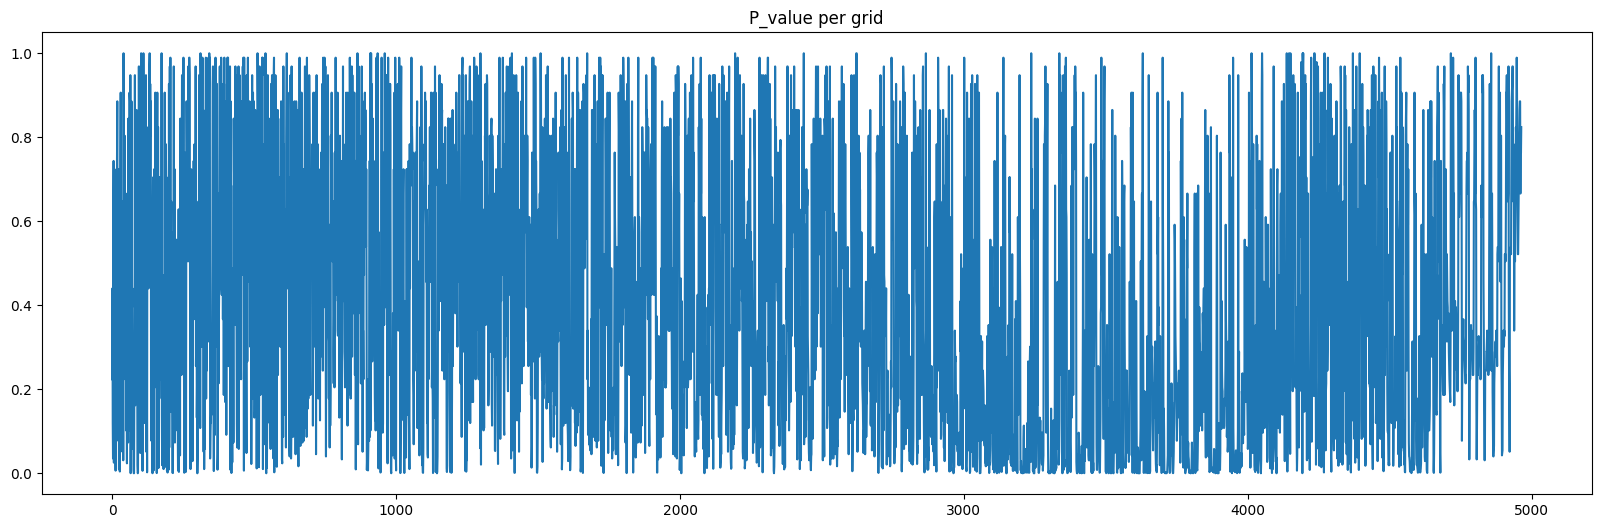

In [109]:
plt.figure(figsize=(20, 6))
sns.lineplot(p_value_all)
plt.title('P_value per grid')

<Axes: ylabel='Count'>

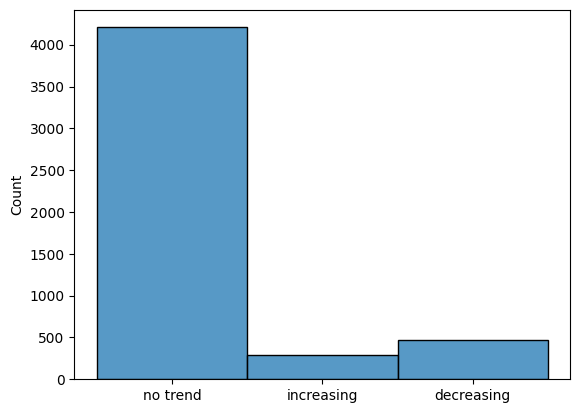

In [110]:
sns.histplot(trend_all)

### there is a higher proportion of decreasing trends, a lower portion of increasing trends, and a higher prortion of no trend from 1980 - 2016

### (C) Correlate summer ENSO index with summer season rainfall at each grid and spatially map the correltation values. Do this for the entire period and recent period

In [113]:
ensoindex = np.loadtxt('NINO34-JJAS-average-1906-2016.txt')
correlation = india_rainfall.corrwith(pd.Series(ensoindex))
correlation

V1      -0.058595
V2      -0.053660
V3       0.059715
V4       0.119865
V5       0.033566
           ...   
V4960    0.200839
V4961    0.137753
V4962    0.152985
V4963    0.167125
V4964    0.179708
Length: 4964, dtype: float64

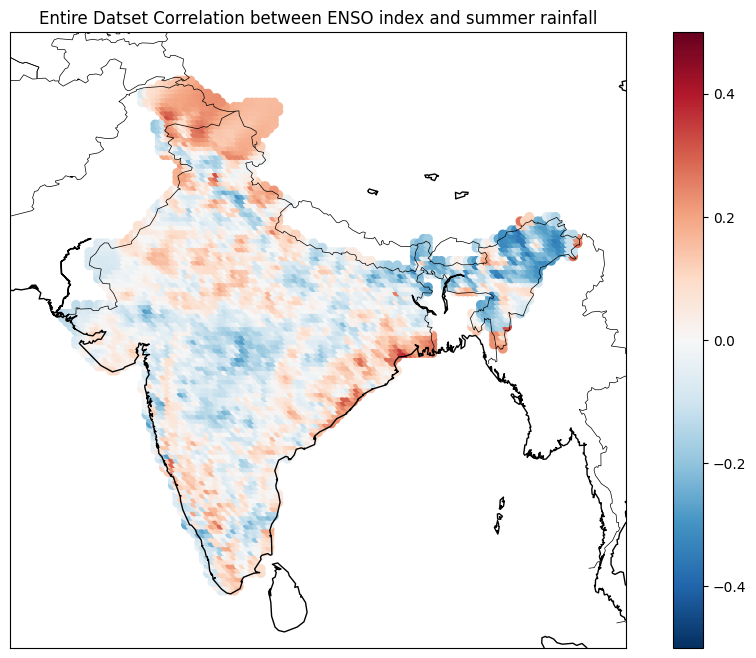

In [117]:
plt.figure(figsize=(12, 8))
m = Basemap(llcrnrlon=65, llcrnrlat=5, urcrnrlon=100, urcrnrlat=40, resolution='l')
m.drawcoastlines()
m.drawcountries()
sc = m.scatter(lat_lon['Latitude'], lat_lon["Longitude"], c=correlation, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
plt.colorbar(sc)
plt.title('Entire Datset Correlation between ENSO index and summer rainfall')
plt.show()

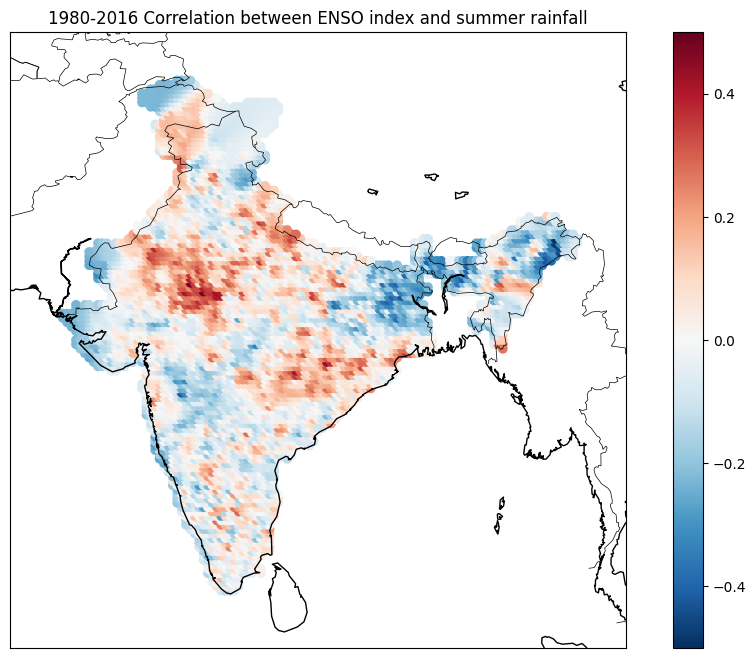

In [119]:
ensoindex = np.loadtxt('NINO34-JJAS-average-1906-2016.txt')

india_rainfall_recent = india_rainfall.iloc[79:116]
india_rainfall_recent

correlation = india_rainfall_recent.corrwith(pd.Series(ensoindex))
correlation

plt.figure(figsize=(12, 8))
m = Basemap(llcrnrlon=65, llcrnrlat=5, urcrnrlon=100, urcrnrlat=40, resolution='l')
m.drawcoastlines()
m.drawcountries()
sc = m.scatter(lat_lon['Latitude'], lat_lon["Longitude"], c=correlation, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
plt.colorbar(sc)
plt.title('1980-2016 Correlation between ENSO index and summer rainfall')
plt.show()

### d) Compute all india rainfall. Select the top 10% years with high rainfall and the bottom 10% with low rainfall. Compute the rainfall average over these years at each grid point and plot them as spatial maps for the high and low rainfall years seperately. These are called 'Composite' maps and will show the spatial pattern of rainfall during an all india wet or all india dry year

In [136]:
rainfall_sum = np.array(india_rainfall.sum(axis = 1))
rainfall_sum.sort()
rainfall_sum_df = pd.DataFrame(rainfall_sum)
rainfall_sum_df


,0
0,328270.396660
1,332485.614224
2,344477.522578
3,352142.761621
4,352395.008488
...,...
111,486348.132600
112,490948.388437
113,493833.060795
114,500541.421429


In [140]:
#Top 10% of 116 rows is ~top 12 and bottom twelve rows
india_rainfall_bottom_ten = rainfall_sum_df.iloc[0:11]
india_rainfall_top_ten = rainfall_sum_df.iloc[105:116]



,0
105,469209.479552
106,471209.326068
107,472689.818231
108,475243.336945
109,477813.067302
110,478218.887140
111,486348.132600
112,490948.388437
113,493833.060795
114,500541.421429
